<a href="https://colab.research.google.com/github/Mumo-vicky/Hypothyroid-Disease-Prediction/blob/main/Hypothyroid_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

## **Defining The Question**

I have been tasked with looking and detrmining the best model for use in prediction for hypothyroidism. This is on behalf of the Nairobi hospital.

## **Defining Metric For Success**

The goal is to find an accurate model for prediction of the disease presence.

## **Understanding The context**

Hypothyroid is a dangerous disease and the earlier the diagnosis, the better. The Nairobi Hospital has collected data and has tasked me with the work of finding the best model. I am to compare and contrast between several decision trees and various support vector machine kernels and finally determine the best suitable for use in diagnosis.

## **Experimental Design**

The following are the steps I am going to follow:
* Loading and checking data
* Tidying the data
* Data Exploration
* Implementing the solution
* Modelling
* Challenging the solution
* Conclusion

## **Data Relevance**

The data has been collected by the Nairobi hospital and it is relevant to our analysis and prediction-model determination.

# **Data Preparation**

## **Loading Data**

In [1]:
#loading our necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC

In [2]:
#loading our dataset
data = pd.read_csv('http://bit.ly/hypothyroid_data')


## **Checking The data**

In [3]:
#checking the top of our dataset.
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
#checking the bottom of our dataset.
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
#checking for the rows and columns
data.shape

(3163, 26)

Our dataset has 3163 rows and 26 columns

In [6]:
#checking for the data types in the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

We can see that the data types for all our columns are objects. We will need to change these to float and categorical data types appropriately.

In [7]:
#seeing the unique variables in the columns
data.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

Most of the columns seem to have categorical values with the rest being majorly float. We will look deeper into the unique variables for a clearer understanding.

In [8]:
#checking for null values
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

As we can see, our data is fairly clean and doesn't have null values.

In [9]:
#checking for duplicate values
data.duplicated().sum()

77

We have 77 duplicated values and we are going to drop these since we are working with a fairly large dataset.

## **Tidying the dataset**

In [10]:
#dropping the duplicated values.
data = data.drop_duplicates()
print(data.duplicated().sum())

0


We can see that the data now has no duplicated values.

In [11]:
#creation of a loop for viewing the unique values.
for column in data.columns:
  print(column)
  print(data[column].unique())
  print()

status
['hypothyroid' 'negative']

age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']

sex
['M' 'F' '?']

on_thyroxine
['f' 't']

query_on_thyroxine
['f' 't']

on_antithyroid_medication
['f' 't']

thyroid_surgery
['f' 't']

query_hypothyroid
['f' 't']

query_hyperthyroid
['f' 't']

pregnant
['f' 't']

sick
['f' 't']

tumor
['f' 't']

lithium
['f' 't']

goitre
['f' 't']

TSH_measured
['y' 'n']

TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '12

We can see that there are values that shouldn't be present. The '?' sign is misplaced and there are several instances of the same. We will convert the sign to a null value and determine whether to drop the values or find a way of dealing with them.

In [12]:
#replacing the '?' sign as a null value.
data.replace('?',np.nan,inplace=True)
data.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

Our TBG column has more than half of the values as null. I will drop these and replace the null values in the other columns using the column mode.

In [13]:
#substituting the null values in the data with the mode values and dropping the TBG column
data = data.drop(columns='TBG')
null_columns = ['age','sex','TSH','T3','TT4','T4U','FTI']
for i in null_columns:
  data[i] = data[i].fillna(data[i].mode()[0])

In [14]:
#checking for the null values.
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

We can see that our null values have been sorted out and our data is now a bit more clean.

In [16]:
#converting the categorical and float columns to their appropriate data types and viewing them.
float_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_columns = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
data[float_columns] = data[float_columns].astype(float)
data[categorical_columns] = data[categorical_columns].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   float64 
 2   sex                        3086 non-null   category
 3   on_thyroxine               3086 non-null   category
 4   query_on_thyroxine         3086 non-null   category
 5   on_antithyroid_medication  3086 non-null   category
 6   thyroid_surgery            3086 non-null   category
 7   query_hypothyroid          3086 non-null   category
 8   query_hyperthyroid         3086 non-null   category
 9   pregnant                   3086 non-null   category
 10  sick                       3086 non-null   category
 11  tumor                      3086 non-null   category
 12  lithium                    3086 non-null   category
 13  goitre                     3086 n

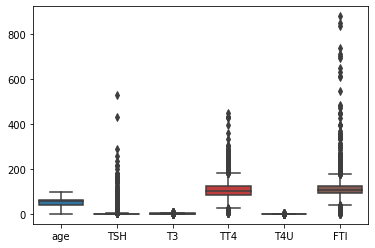

In [17]:
#checking for outliers
colmns = data[float_columns]
plt.figure
ax = sns.boxplot(data = colmns)
plt.show()

Our outliers are evenly distributed within the columns except for two values in the TSH column. We are going to remove them.

In [18]:
#dropping the visible outliers.
c = data[(data['TSH'] > 300)].index
data = data.drop(c) 

In [19]:
#checking for the final size of the dataset.
data.shape

(3084, 25)

Our dataset is now clean and we can proceed to the analysis.

# **Exploratory data Analysis**

We are going to perform univariate, bivariate and multivariate analysis in order for us to get a deeper understanding of the data we have and relations within the columns.

## **Univariate Analysis**

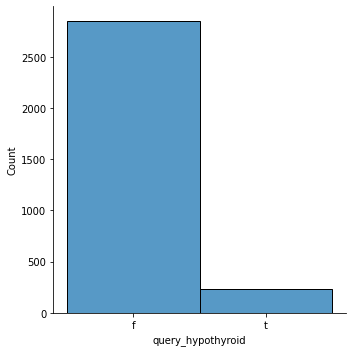

In [20]:
#histogram for hypothyroid cases
sns.displot(x='query_hypothyroid', data=data)

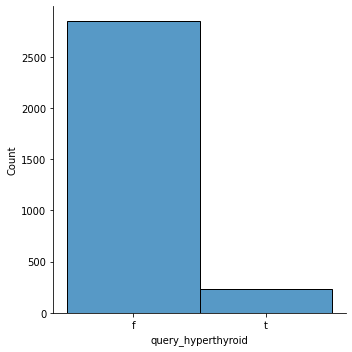

In [21]:
#histogram for hyperthyroid cases
sns.displot(x='query_hyperthyroid', data=data)

We can see that there is a similar trend with the patients with hyperthyroid and hypothyroid. With both having more patients without the conditions. There may be a relation between the two.

## **Bivariate Analysis**

## **Mulitivariate Analysis**

In [22]:
#creating two categories for the columns
category_1  = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
category_2 = ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre']
#loops to convert the columns to numerical values respectively.
for column in category_1:
  data[column] = np.where(data[column] == 'y', 1, 0)

for column in category_2:
  data[column] = np.where(data[column] == 't', 1, 0)

data['sex'] = np.where(data['sex'] == 'M', 1, 0)
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,hypothyroid,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
4,hypothyroid,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0
5,hypothyroid,85.0,0,0,0,0,0,1,0,0,0,0,0,0,1,138.0,1,1.1,1,27.0,1,1.19,1,23.0,0


# **Decision trees**

## **Random Forest**

In [23]:
#splitting the dataset.
y = data['status'].values

test_features = data.columns.to_list()
test_features.remove('status')
test_features.remove('TBG_measured')

x = data[test_features].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
#fitting the model and predicting.
random_forest = RandomForestClassifier(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
random_forest = random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

In [25]:
#getting the accuracy
print('The accuracy score is:', accuracy_score(y_test, y_pred))

The accuracy score is: 0.9821717990275527


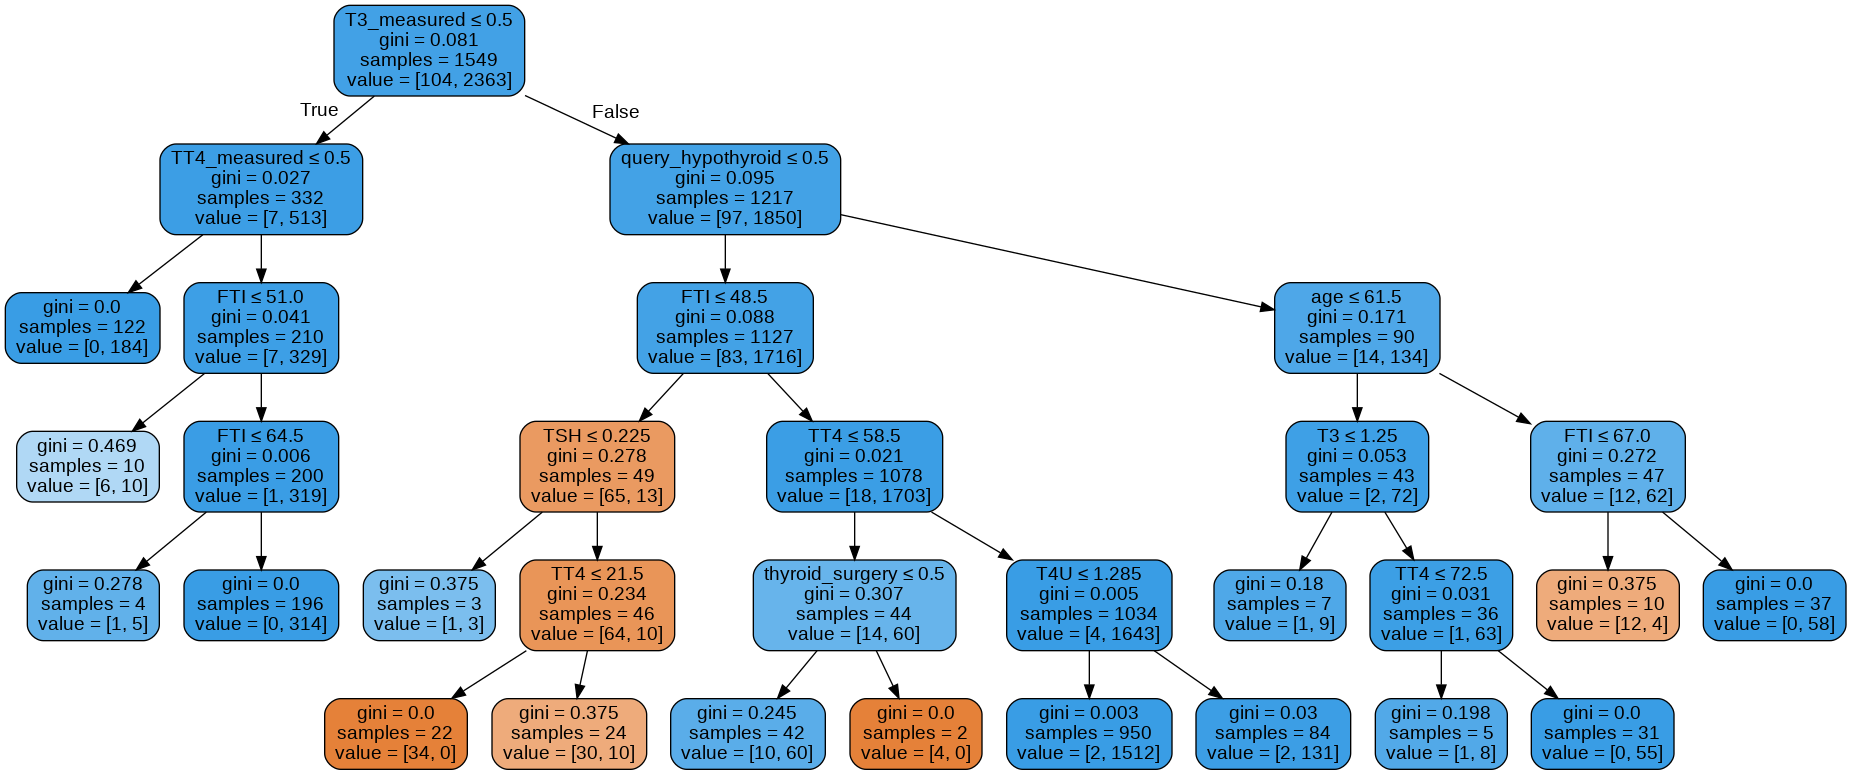

In [26]:
#displaying 50 trees
dot_data = StringIO()
tree = random_forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [29]:
#displaying the importances of the columns
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:27} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                         Importance: 0.86
Variable: TT4                         Importance: 0.05
Variable: thyroid_surgery             Importance: 0.04
Variable: TSH                         Importance: 0.02
Variable: age                         Importance: 0.01
Variable: T3_measured                 Importance: 0.01
Variable: sex                         Importance: 0.0
Variable: on_thyroxine                Importance: 0.0
Variable: query_on_thyroxine          Importance: 0.0
Variable: on_antithyroid_medication   Importance: 0.0
Variable: query_hypothyroid           Importance: 0.0
Variable: query_hyperthyroid          Importance: 0.0
Variable: pregnant                    Importance: 0.0
Variable: sick                        Importance: 0.0
Variable: tumor                       Importance: 0.0
Variable: lithium                     Importance: 0.0
Variable: goitre                      Importance: 0.0
Variable: TSH_measured                Importance: 0.0
Variable: T3          

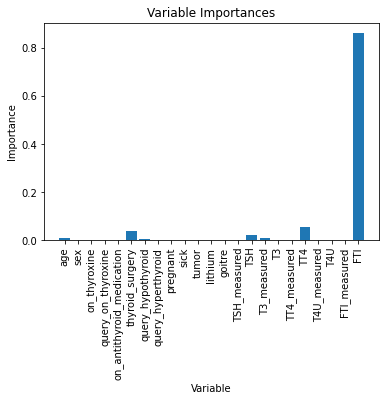

In [30]:
#plotting the importances.
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The accuracy score for the random forest model is 0.9821717990275527 which is good.

## **Ada Boosted Trees**

In [41]:
#splitting the dataset
y1 = data[['status']].values
x1 = data[['FTI']].values

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [42]:
#building the model, fitting it and predicting use the whole dataset.
tree = DecisionTreeClassifier(max_depth=4)
tree = tree.fit(x1_train, y1_train)

y1_pred_tree = tree.predict(x1)

In [44]:
#calculation fo the accuracy
print("Accuracy:",accuracy_score(y1, y1_pred_tree))

Accuracy: 0.9811932555123216


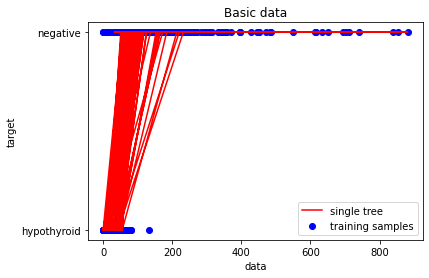

In [38]:
#plotting the base model
plt.figure()
plt.scatter(x1, y1.flatten(), c="b", label="training samples")
plt.plot(x1, y1_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

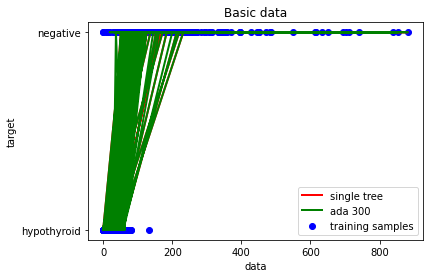

In [39]:
#creating the boosted model
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=300, random_state=0)
#fitting the model and predicting using the same
ada_boost = ada_boost.fit(x1_train, y1_train)
y1_pred_ada = ada_boost.predict(x1)

#plotting the boosted model against the base model.
plt.figure()
plt.scatter(x1, y1.flatten(), c="b", label="training samples")
plt.plot(x1, y1_pred_tree, c="r", label="single tree", linewidth=2)
plt.plot(x1, y1_pred_ada, c="g", label="ada 300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

In [196]:
print("Accuracy:",accuracy_score(y1_test, y1_pred_ada))

Accuracy: 0.9756888168557536


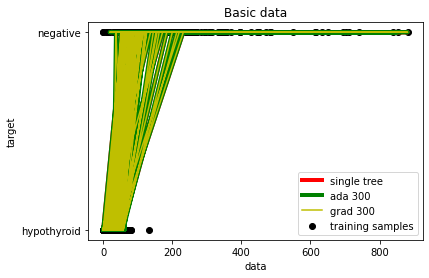

In [40]:
grad = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=2)
grad = grad.fit(x1_train, y1_train)

y1_pred_grad = grad.predict(x1)

plt.figure()
plt.scatter(x1, y1.flatten(), c="k", label="training samples")
plt.plot(x1, y1_pred_tree, c="r", label="single tree", linewidth=4)
plt.plot(x1, y1_pred_ada, c="g", label="ada 300", linewidth=4)
plt.plot(x1, y1_pred_grad, c="y", label="grad 300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

In [198]:
print("Accuracy:",accuracy_score(y1_test, y1_pred_grad))

Accuracy: 0.9708265802269044


# **Support Vector Machines**

## **Linear**

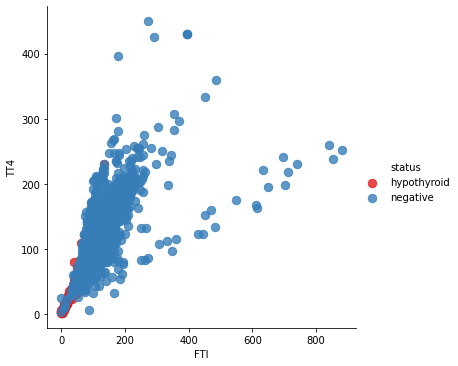

In [199]:
sns.lmplot('FTI', 'TT4', data=data, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [217]:
#splitting the dataset
x3 = data.drop(['status'],axis=1)
y3 = np.where(data['status']=='hypothyroid',0,1)

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 0)

In [222]:
lin_model = SVC(kernel = 'linear')
lin_model.fit(x3_train,y3_train)

y3_pred_lin = lin_model.predict(x3_test)
y3_pred_lin

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [226]:
lin_model_accuracy = accuracy_score(y3_test,y3_pred_lin)
print(lin_model_accuracy)
# We've gotten a classification rate of 95.61%. This is a pretty good accuracy score 

# For further evaluation you can also check the confusion matrix
lin_confusion_matrix = confusion_matrix(y3_test, y3_pred_lin)
print(lin_confusion_matrix)

0.9821717990275527


TypeError: ignored

0.9821717990275527


TypeError: ignored

## **Polynomial**

In [ ]:
poly_model = SVC(kernel='poly',degree=3,gamma'auto')
poly_model.fit(x3_train, y3_train)

In [ ]:
def make_mesh(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = poly_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## **Radial Basis Function (Rbf)**

In [ ]:
#building and training the model
rbf_mode = SVC(kernel='rbf')
rbf_model.fit(x3_train, y3_train)